# Jingwen Tan (012135461)

## Orignal US Death Graph 

US Death Equation(Curve-Fit): 10.824264107466483x^2 + -15965149.057606986x + 5886912535194.055

Linear Regression
n= 112
sum_x= 592.5562189222435
sum_x^2= 5559.273205259407
sum_y= 1513.234620814725
sum_xy= 8006.0629058123695

[a,b]= [1.35109755e+01 9.06098077e-06]

In Log method: y= 737466.1452354323*x^9.060980774921662e-06

In Linear method: y=672.9702010812784x+-496299322.9938159


<Figure size 432x288 with 0 Axes>

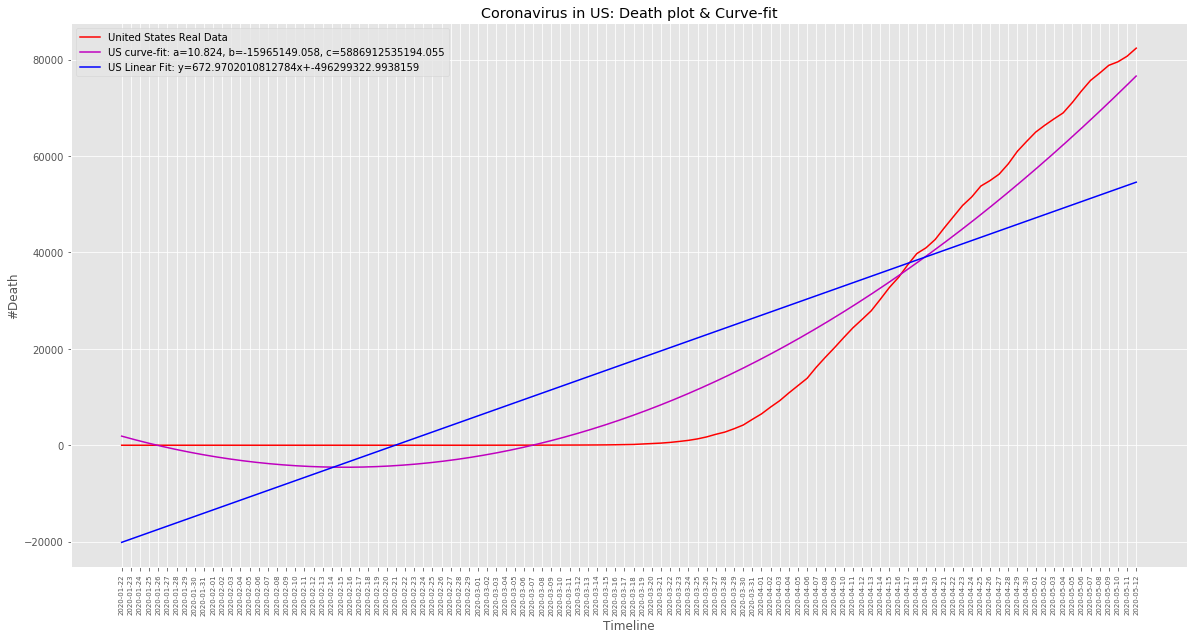

In [37]:
import time
import math
import numpy as np
import pandas as pd
import datetime as DT
import matplotlib.pyplot as plt
from numpy import log as ln
from statistics import mean
import matplotlib.dates as mdates
from matplotlib import style
from scipy.optimize import curve_fit

df =pd.read_csv('time_series_covid19_deaths_global (1).csv') #death file 

#create list for time

datetimeTotal = []
datetimeJan = []
datetimeFeb = []
datetimeMar = []
datetimeApril = []
datetimeMay = []

numtimeTotal = []
numtimeJan = []
numtimeFeb = []
numtimeMar = []
numtimeApril = []
numtimeMay = []


########################## US Death Rate ##########################

USinSheet = 225 #located at row 225
us_death = df.iloc[USinSheet]

#variable for operating the linear regression
n_LR = 0 #n
us_x_LR = 0 #sum of x
us_xsq_LR = 0 # sum of x^2
us_xy_product = 0 # sum of x*y
us_y_time = 0 # sum of y


#death number
us_deathTotal_y = []
us_deathJan = []
us_deathFeb = []
us_deathMar = []
us_deathApril = []
us_deathMay = []

#days in month
Jan_us = 22
Feb_us = 1
Mar_us = 1
April_us = 1
May_us = 1

while Jan_us <= 31:
    date = str(Jan_us) #convert to string for following function
    daily_us_death = us_death['1/'+ date +'/2020']
    us_deathJan.append(daily_us_death) #covert daily number to an array
     
    #code for time: x-axis
    presentDate = DT.datetime(2020, 1, Jan_us) 
    convert = mdates.date2num(presentDate)
    datetimeJan.append(presentDate)
    numtimeJan.append(convert)
    Jan_us+=1
    
    #code for linear regression in log/ln
    if(daily_us_death ==0):
        us_x_LR = 0
        us_xsq_LR = 0
        us_xy_product = 0
    else:
        us_death_LR+=np.log(daily_us_death)
        us_deathsq_LR = us_xsq_LR + (np.log(daily_us_death))**2 
        us_xy_product += np.log(convert)*np.log(daily_us_death)
    
    n_LR+=1
    us_y_time +=  np.log(convert)
    
while Feb_us <=29:
    date = str(Feb_us)
    daily_us_death = us_death['2/'+ date + '/2020']
    us_deathFeb.append(daily_us_death)
    
    presentDate = DT.datetime(2020, 2, Feb_us) 
    convert = mdates.date2num(presentDate)
    datetimeFeb.append(presentDate)
    numtimeFeb.append(convert)
    Feb_us+=1

 #code for linear regression in log/ln
    if(daily_us_death ==0):
        us_x_LR = 0
        us_xsq_LR = 0
        us_xy_product = 0
    else:
        us_x_LR+=np.log(daily_us_death)
        us_xsq_LR = us_xsq_LR + (np.log(daily_us_death))**2 
        us_xy_product += np.log(convert)*np.log(daily_us_death)
    
    n_LR+=1
    us_y_time +=  np.log(convert)

while Mar_us <=31:
    date = str(Mar_us)
    daily_us_death = us_death['3/'+ date + '/2020']
    us_deathMar.append(daily_us_death)   
    
    #code for time: x-axis
    presentDate = DT.datetime(2020, 3, Mar_us) 
    convert = mdates.date2num(presentDate)
    datetimeMar.append(presentDate)
    numtimeMar.append(convert)
    Mar_us+=1
    
    #code for linear regression in log/ln
    if(daily_us_death ==0):
        us_x_LR = 0
        us_xsq_LR = 0
        us_xy_product = 0
    else:
        us_x_LR+=np.log(daily_us_death)
        us_xsq_LR = us_xsq_LR + (np.log(daily_us_death))**2 
        us_xy_product += np.log(convert)*np.log(daily_us_death)
    
    n_LR+=1
    us_y_time +=  np.log(convert)

while April_us <=30:
    date = str(April_us)
    daily_us_death = us_death['4/'+ date + '/2020']
    us_deathApril.append(daily_us_death)
            
    #code for time: x-axis
    presentDate = DT.datetime(2020, 4, April_us) 
    convert = mdates.date2num(presentDate)
    datetimeApril.append(presentDate)
    numtimeApril.append(convert)
    April_us+=1
    
    #code for linear regression in log/ln
    if(daily_us_death ==0):
        us_x_LR = 0
        us_xsq_LR = 0
        us_xy_product = 0
    else:
        us_x_LR+=np.log(daily_us_death)
        us_xsq_LR = us_xsq_LR + (np.log(daily_us_death))**2 
        us_xy_product += np.log(convert)*np.log(daily_us_death)
    
    n_LR+=1
    us_y_time +=  np.log(convert)

while May_us <=12:
    date = str(May_us)
    daily_us_death = us_death['5/'+ date + '/2020']
    us_deathMay.append(daily_us_death)     
        
    #code for time: x-axis
 
    presentDate = DT.datetime(2020, 5, May_us) 
    convert = mdates.date2num(presentDate)
    datetimeMay.append(presentDate)
    numtimeMay.append(convert)
    May_us+=1
    #code for linear regression in log/ln
    if(daily_us_death ==0):
        us_x_LR = 0
        us_xsq_LR = 0
        us_xy_product = 0
    else:
        us_x_LR+=np.log(daily_us_death)
        us_xsq_LR = us_xsq_LR + (np.log(daily_us_death))**2 
        us_xy_product += np.log(convert)*np.log(daily_us_death)
    
    n_LR +=1
    us_y_time +=  np.log(convert)
    
us_deathTotal_y = us_deathJan + us_deathFeb + us_deathMar + us_deathApril + us_deathMay

datetimeTotal = datetimeJan + datetimeFeb + datetimeMar + datetimeApril + datetimeMay

numtimeTotal = numtimeJan + numtimeFeb + numtimeMar + numtimeApril + numtimeMay


########################## DeathGraph  ###################
plt.figure(1)
figure, axes = plt.subplots(figsize =(20,10))

axes.plot(datetimeTotal,us_deathTotal_y,'r', label = "United States Real Data")
ax=plt.gca()

plt.xlabel('Timeline')
plt.ylabel('#Death')

plt.xticks(rotation = 90)
plt.xticks(datetimeTotal)
plt.xticks(fontsize = 7 )

plt.title('Coronavirus in US: Death plot & Curve-fit')

########################## Death Graph curve-fit ##########################

#define equation that solve the fitted-curve
def func(x,a,b,c):
    return a*(x**2)+b*x+c


#Best-fit curve calculation

popt_us, pcov =  curve_fit(func,numtimeTotal,us_deathTotal_y)

#curve limit
xFit = np.arange(737446,737557,0.01) # for future lab reminder: 0.01 instead of 1 prevent too high horizational line & low horizational data points

#Best-fit curve graph

axes.plot(xFit, func(xFit,*popt_us),'m',label = 'US curve-fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_us) )


print("US Death Equation(Curve-Fit): "+str(popt_us[0])+"x^2 + "+str(popt_us[1])+"x + "+str(popt_us[2])+'\n')

########################## Linear Regressions  ###################
countLR = 0
deathLR = []

print("Linear Regression")
print("n= " + str(n_LR))
print("sum_x= " + str(us_x_LR))
print("sum_x^2= " + str(us_xsq_LR))
print("sum_y= " + str(us_y_time))
print("sum_xy= "+ str(us_xy_product)) 

A= np.array([[n_LR,us_x_LR],[us_x_LR,us_xsq_LR]])
B= np.array([us_y_time,us_xy_product])
solve = np.linalg.solve(A,B)
print("\n"+"[a,b]= "+str(solve))

a=(solve[0])
b=(solve[1])
c=math.exp(a)

expression = "\n"+"In Log method: y= "+str(c)+"*x^"+str(b)+"\n"
print(expression)

########################## Linear Fit  ###################
xs = np.array(numtimeTotal, dtype=np.float64)
ys = np.array(us_deathTotal_y, dtype=np.float64)

def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys))-mean(xs*ys))/
        ((mean(xs)*mean(xs))-mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b

m,b = best_fit_slope_and_intercept(xs,ys)

m_new = str(m)
b_new =str(b)
eqLinear = "y="+m_new+"x"+"+"+b_new
print("In Linear method: "+eqLinear)


regression_line = [(m*x)+b for x in xs]
style.use('ggplot')


axes.plot(xs, regression_line,'b',label = 'US Linear Fit: '+eqLinear)

axes.legend()


## Graph with inflecting assumption from Jan, 01 - Feb, 15

Total Death Before Shelter in Place(1/1-2/15): 3518437208883

Death after Shelter in Place(2/16-5/12): 129008.0

Total Death (1/1-5/12): 3518437337891.0

US Death Equation(Curve-Fit): -458273624.4594094x^2 + 96183098756.00027x + -1329271547424.6453



<Figure size 432x288 with 0 Axes>

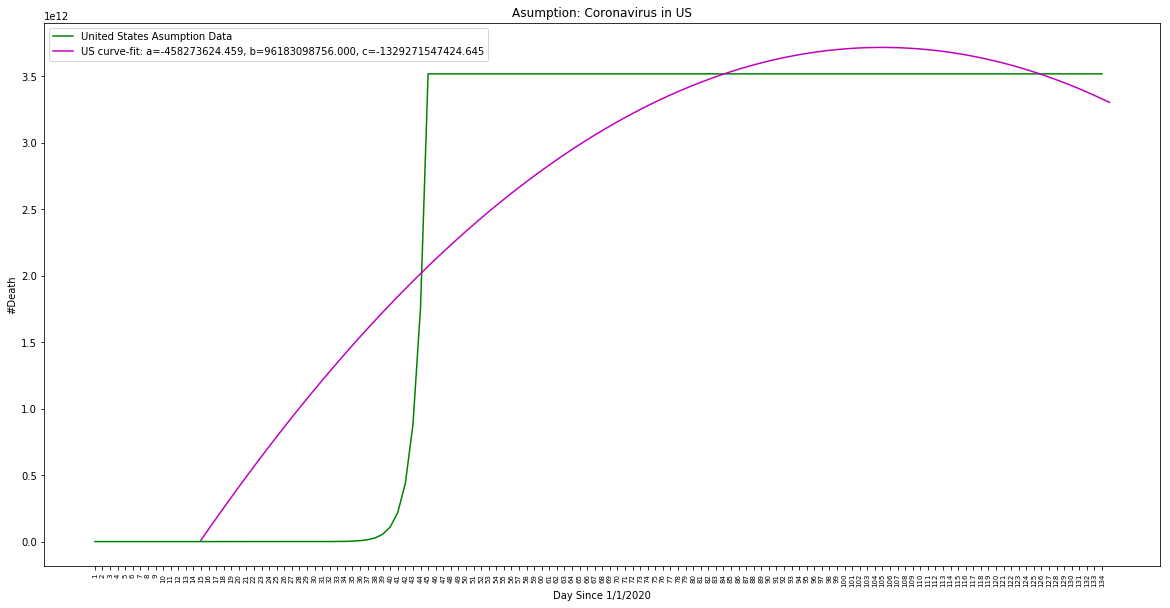

In [34]:

import time
import math
import numpy as np
import pandas as pd
import datetime as DT
import matplotlib.pyplot as plt
from numpy import log as ln
import matplotlib.dates as mdates
from scipy.optimize import curve_fit

df =pd.read_csv('time_series_covid19_deaths_global (1).csv') #death file 

#create list for time

datetimeTotal = []
datetimeJan = []
datetimeFeb = []
datetimeMar = []
datetimeApril = []
datetimeMay = []

numtimeTotal = []
numtimeJan = []
numtimeFeb = []
numtimeMar = []
numtimeApril = []
numtimeMay = []


########################## US Death Rate ##########################

USinSheet = 225 #located at row 225
us_death = df.iloc[USinSheet]

Day_in_March = 14
Day_in_April = 30
Day_in_May = 12
Total_day = Day_in_March + Day_in_April + Day_in_May
March_19 = us_death['3/19/2020']  # First US Shelther in place start at March 19 in California, thus we use death rate after 3/19
May_12 = us_death['5/12/2020']
Daily_ave_death = round((May_12-March_19)/Total_day) #find average daily death after 2/15

######################## Asumption Case from 1/1 - 2/15 #######################
jan =31
feb_15 = 15
dayBeforeShelter = jan+feb_15
infection= 1
day_1 = 1
day_2 = 46
dayAfterShelter = 88 # number of days from 2/15-5/12
totalday = dayBeforeShelter + dayAfterShelter

nDayAfterShelter = 1
date = 0
x_date =[]

beforeShelter = []
beginShelter = []
y_asumptionTotal = []

while day_1 < dayBeforeShelter:

    infection = infection+2**day_1
    day_1+=1
    mortality = round(0.05*infection)
    beforeShelter.append(mortality)
print("Total Death Before Shelter in Place(1/1-2/15): " + str(mortality)+"\n")

while day_2 <= totalday:
    beginShelter.append(beforeShelter[dayBeforeShelter-2]+Daily_ave_death*nDayAfterShelter)
    nDayAfterShelter+=1
    day_2 +=1

print("Death after Shelter in Place(2/16-5/12): " + str(Daily_ave_death*dayAfterShelter)+"\n")
while date < totalday:
    date+=1
    x_date.append(date)

y_assumptionTotal = beforeShelter+beginShelter
print("Total Death (1/1-5/12): " + str(y_assumptionTotal[len(y_assumptionTotal)-2])+"\n")
#print(len(y_assumptionTotal))
#print(len(x_date))
#print(x_date)

date_array = np.array(x_date)
#print(date_array)

plt.figure(1)
figure, axes = plt.subplots(figsize =(20,10))

axes.plot(x_date,y_assumptionTotal,'g', label = "United States Asumption Data")
ax=plt.gca()

plt.xlabel('Day Since 1/1/2020')
plt.ylabel('#Death')

plt.xticks(rotation = 90)
plt.xticks(x_date)
plt.xticks(fontsize = 7 )

plt.title('Asumption: Coronavirus in US')

########################## Death Graph curve-fit ##########################

#define equation that solve the fitted-curve
def func(x,a,b,c):
    return a*(x**2)+b*x+c


#Best-fit curve calculation

popt_us, pcov =  curve_fit(func,x_date,y_assumptionTotal)

#curve limit
xFit = np.arange(15,135,0.01) # for future lab reminder: 0.01 instead of 1 prevent too high horizational line & low horizational data points

#Best-fit curve graph

axes.plot(xFit, func(xFit,*popt_us),'m',label = 'US curve-fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_us) )


print("US Death Equation(Curve-Fit): "+str(popt_us[0])+"x^2 + "+str(popt_us[1])+"x + "+str(popt_us[2])+'\n')
axes.legend()
